# Theory: Bessel-Gauss beam

In [9]:
# from beams package ./beams/test_airy.py
import numpy as np
from test_bessel_gauss import plot_bessel_function, plot_bessel_gauss_function, plot_bg_pupil_full, plot_bg_propagation_pupil

### References:

1. Gori, F., Guattari, G. & Padovani, C. Bessel-Gauss beams. Optics Communications 64, 491–495 (1987).
2. Vaity, P. & Rusch, L. Perfect vortex beam: Fourier transformation of a Bessel beam. Opt. Lett., OL 40, 597–600 (2015).






## The Bessel beam

The Bessel beam, described by the Bessel function along the radial coordinate, is a non-diffracting beam solution to the wave equation.
Here, we only consider a zero-order Bessel beam, which is described by:
$$
E(r, z) = J_0(k_r r) \exp(i k_z z) \, ,
$$
where $k_r$ and $k_z$ are radial and longitudinal wave vectors: $k = \sqrt{k_r^2+k_z^2} = 2\pi/\lambda$, and $J_0$ is the zero-order Bessel function, visualised below.

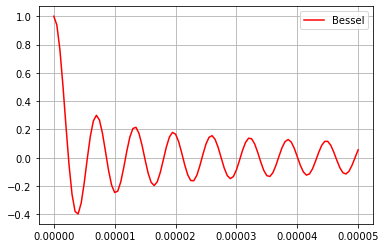

In [2]:
plot_bessel_function()

Each peak described a circular intensity that has equal energy.
A finite energy beam can be described by a Bessel modulated by a Gaussian envelope - a Bessel-Gauss beam, described in the focus ($z=0$) as:
$$
E(r) = J_0(k_r r) \exp(-r^2/w_g^2) \, ,
$$
where $w_g$ is the waist of the Gaussian modulation beam.

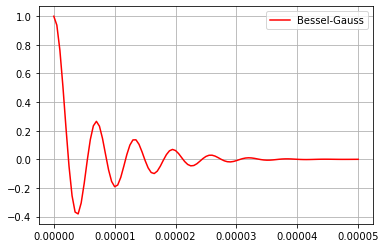

In [3]:
plot_bessel_gauss_function()

***The goal of this work is to describe the Bessel-Gauss beam in the pupil plane, relate it to experimental configurations, and to describe the propagation close to the focal plane***

## Bessel-Gauss beam in the pupil plane

The pupil function can be described by a Fourier transform of the beam at focus. Following the derivation in [2], using the Bessel function identity, the pupil function is:
$$
E_1(r_1) = \frac{w_g}{w_0} \exp\left(-\frac{r_1^2+r_r^2}{w_0^2} \right) 
I_0\left(\frac{2 r_r r_1}{w_0^2} \right) \, ,
$$
where $w_0 = 2f/kw_g$, $r_r = k_r f/k$ and $I_0$ is the modified Bessel function of zero order and of first kind.

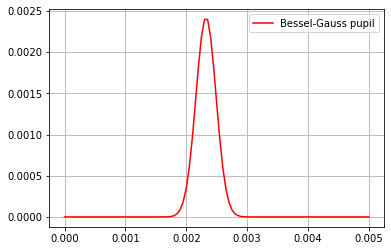

In [4]:
plot_bg_pupil_full()

Typically, $r_r$ is much larger than $w_0$.
In this case, $I_0(x) \sim \exp(x)$, reducing the above equation to:
$$
E_1(r_1) = \frac{w_g}{w_0} \exp\left(-\frac{(r_1-r_r)^2}{w_0^2} \right) 
 \, .
$$
This describes a ring with a Gaussian thickness.

If we consider the refocussing of this beam in 2D (x,z), it describes two off-axis Gaussian beams that cross at focus, creating a Bessel beam via interference.
In 3D, this can be described by vectors following a conical shape.

## Bessel-Gauss beam propagation at the focus

Let's consider again the field of the Bessel-Gauss at focus ($z=0$), which we name $E_2(r_2)$.
Here, we follow the work of [1].
As the field propagates in $z$, it is subject to diffraction, which can be described by the Fresnel diffraction integral:
\begin{align*}
E(r,z) &= (-ik/z)\exp(i(kz+kr^2/(2z))) \\ &\times
\int^\infty_0 E(r_0, 0) \exp(ikr_0^2/(2z)) J_0(kr_0r/z) r_0 dr_0
\end{align*}

According to [1], this can transformed into the following form:
\begin{align*}
E(r,z) &= (A w_g/w(z)) \\
&\times \exp\{i[(k-k_r^2/(2k))z - \Phi(z)]\} \, J_0(k_r r / (1+iz/L)) \\
&\times  \exp\{ [-1/w(z)^2 + ik/(2R(z))] (r^2+k_r^2z^2/k^2) \} \, ,
\end{align*}
where 
\begin{align*}
L &= kw_g^2/2 \\
w(z) &= w_g [1+(z/L)^2]^{1/2} \\
\Phi(z) &= \arctan(z/L) \\
R(z) &= z+L^2/z
\end{align*}

Note the similarities to a Gaussian beam propagation, where $R(z)$ is the radius of curvature, $\Phi(z)$ is the Gouy phase, $w(z)$ is the spot size parameter, and $L$ is an effective analog of the Rayleigh range.

We plot the Bessel-Gauss propagation using the pupil parameters, which can be trivially substituted into the above as $w_g = 2f/(w_0k)$ and $k_r = r_r k/f$. 

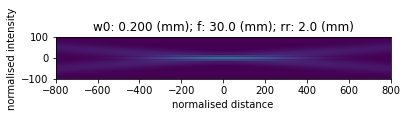

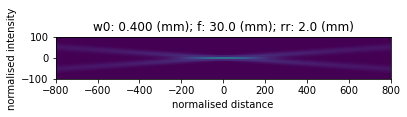

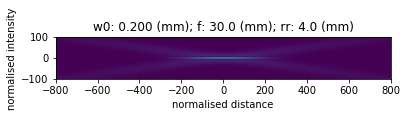

In [5]:
plot_bg_propagation_pupil(rr = 2e-3, w0 = 2e-4, f = 30e-3)
plot_bg_propagation_pupil(rr = 2e-3, w0 = 4e-4, f = 30e-3)
plot_bg_propagation_pupil(rr = 4e-3, w0 = 2e-4, f = 30e-3)

Note, the plots are of the absolute electric field.
Intensity can be expressed as $I = |E|^2$. 

## Bessel beam generated by an axicon

It is difficult to generate a Bessel beam by modulating the pupil plane. This is because the energy is spatially concentrated in a thin ring. 

Alternatively, a bessel-like beam can be generated by an axicon lens. 

Here, we do a very rough approximation that only takes into account several key elements of the electric field at the focal plane of the axicon as evaluated by Tomas Cizmar in his thesis.

The far field diffraction at a distance $f$, corresponding to the focal lens of a reimging lens, is $f\tan(\alpha_0)$, where $\alpha_0$ is the angle of the conical wavefront with respect to the optical axis. 

The ring width at the lens is $\omega/2$, where $\omega$ is the size of the beam illuminating the axicon. This is refocussed to a ring width at the pupil plane of $4f/(k\omega)$.

0.0031416572515934357
3.395305452627101e-05


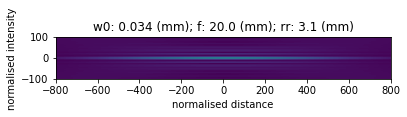

In [10]:
lambda0 = 800e-9
k = 2*np.pi/lambda0

a0 = 1*np.pi/180 * (1.45 - 1)
f1 = 100e-3
rr = f1*np.tan(a0)
w = 6e-3
w0 = 4*f1/(w*k)

mag_fourier = 200/50

rr = rr*mag_fourier
w0 = w0*mag_fourier

print(rr)
print(w0)

plot_bg_propagation_pupil(rr = rr, w0 = w0, f = 20e-3)